In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [9]:
# Load data
df = pd.read_csv("retail_sales_data.csv")

In [15]:
df

,Date,Region,Product,Quantity Sold,Unit Price,Revenue,Month
0,2024-01-01,North,Laptop,61,1428.54,87140.94,2024-01
1,2024-01-01,North,Smartphone,81,918.05,74362.05,2024-01
2,2024-01-01,North,Headphones,92,194.96,17936.32,2024-01
3,2024-01-01,North,Tablet,84,1305.96,109700.64,2024-01
4,2024-01-01,North,Smartwatch,33,993.79,32795.07,2024-01
...,...,...,...,...,...,...,...
1795,2024-03-30,West,Laptop,74,219.75,16261.50,2024-03
1796,2024-03-30,West,Smartphone,98,274.50,26901.00,2024-03
1797,2024-03-30,West,Headphones,88,358.97,31589.36,2024-03
1798,2024-03-30,West,Tablet,60,1330.34,79820.40,2024-03


In [18]:
# Create revenue column if not present
df["Revenue"] = df["Quantity Sold"] * df["Unit Price"]
df['Revenue'] = df['Revenue'].astype(int)



In [19]:
df

,Date,Region,Product,Quantity Sold,Unit Price,Revenue,Month
0,2024-01-01,North,Laptop,61,1428.54,87140,2024-01
1,2024-01-01,North,Smartphone,81,918.05,74362,2024-01
2,2024-01-01,North,Headphones,92,194.96,17936,2024-01
3,2024-01-01,North,Tablet,84,1305.96,109700,2024-01
4,2024-01-01,North,Smartwatch,33,993.79,32795,2024-01
...,...,...,...,...,...,...,...
1795,2024-03-30,West,Laptop,74,219.75,16261,2024-03
1796,2024-03-30,West,Smartphone,98,274.50,26901,2024-03
1797,2024-03-30,West,Headphones,88,358.97,31589,2024-03
1798,2024-03-30,West,Tablet,60,1330.34,79820,2024-03


In [26]:
# Convert date
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")



In [32]:
df

,Date,Region,Product,Quantity Sold,Unit Price,Revenue,Month,Month_Omly
0,2024-01-01,North,Laptop,61,1428.54,87140,2024-01,2024-01
1,2024-01-01,North,Smartphone,81,918.05,74362,2024-01,2024-01
2,2024-01-01,North,Headphones,92,194.96,17936,2024-01,2024-01
3,2024-01-01,North,Tablet,84,1305.96,109700,2024-01,2024-01
4,2024-01-01,North,Smartwatch,33,993.79,32795,2024-01,2024-01
...,...,...,...,...,...,...,...,...
1795,2024-03-30,West,Laptop,74,219.75,16261,2024-03,2024-03
1796,2024-03-30,West,Smartphone,98,274.50,26901,2024-03,2024-03
1797,2024-03-30,West,Headphones,88,358.97,31589,2024-03,2024-03
1798,2024-03-30,West,Tablet,60,1330.34,79820,2024-03,2024-03


In [33]:
# Total sales by region
region_sales = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)



In [37]:
# Drop the column if it exists
if "Month_Omly" in df.columns:
	df.drop(columns=["Month_Omly"], inplace=True)
else:
	print("Column 'Month_Omly' does not exist in the dataframe.")

Column 'Month_Omly' does not exist in the dataframe.


In [38]:
df

,Date,Region,Product,Quantity Sold,Unit Price,Revenue,Month
0,2024-01-01,North,Laptop,61,1428.54,87140,2024-01
1,2024-01-01,North,Smartphone,81,918.05,74362,2024-01
2,2024-01-01,North,Headphones,92,194.96,17936,2024-01
3,2024-01-01,North,Tablet,84,1305.96,109700,2024-01
4,2024-01-01,North,Smartwatch,33,993.79,32795,2024-01
...,...,...,...,...,...,...,...
1795,2024-03-30,West,Laptop,74,219.75,16261,2024-03
1796,2024-03-30,West,Smartphone,98,274.50,26901,2024-03
1797,2024-03-30,West,Headphones,88,358.97,31589,2024-03
1798,2024-03-30,West,Tablet,60,1330.34,79820,2024-03


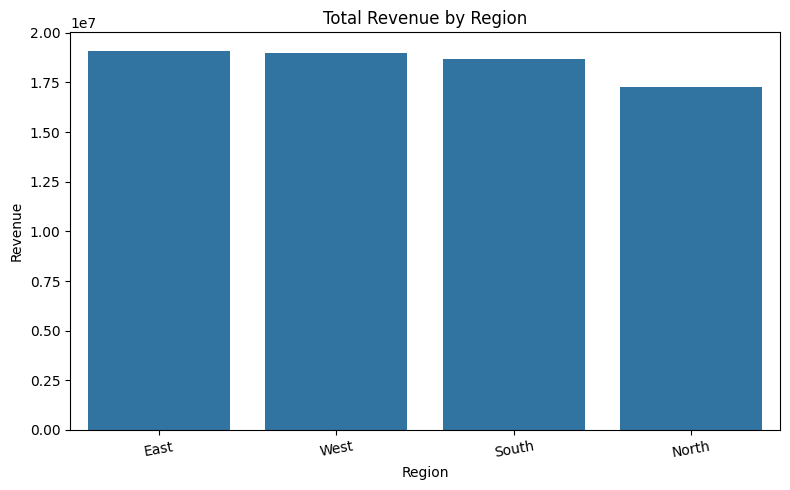

In [44]:
# Plot region-wise sales
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Revenue by Region")
plt.ylabel("Revenue")
plt.xlabel("Region")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()



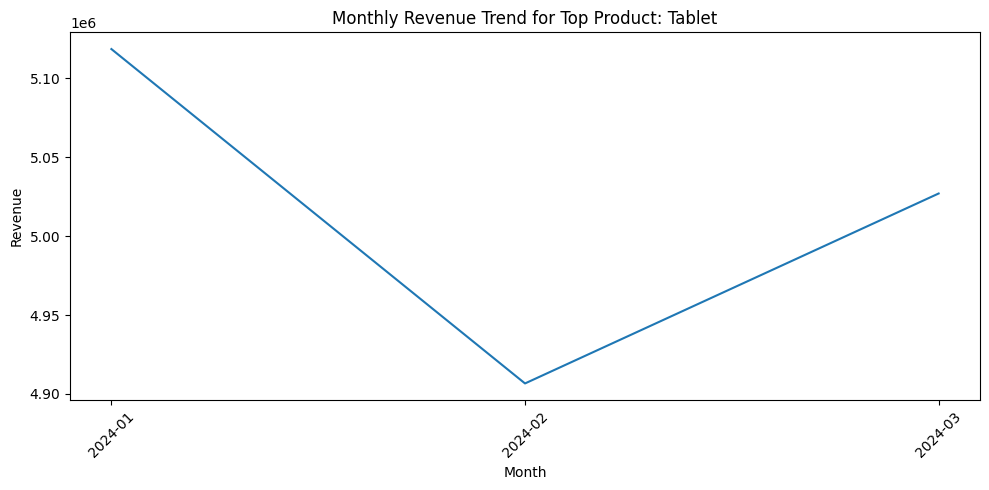

In [46]:
# Monthly trend for top product
top_product = df.groupby("Product")["Revenue"].sum().idxmax()
top_product_data = df[df["Product"] == top_product]

plt.figure(figsize=(10, 5))
monthly_revenue = top_product_data.groupby("Month")["Revenue"].sum().reset_index()
monthly_revenue["Month"] = monthly_revenue["Month"].astype(str)  # Convert Month to string
sns.lineplot(data=monthly_revenue, x="Month", y="Revenue")
plt.title(f"Monthly Revenue Trend for Top Product: {top_product}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



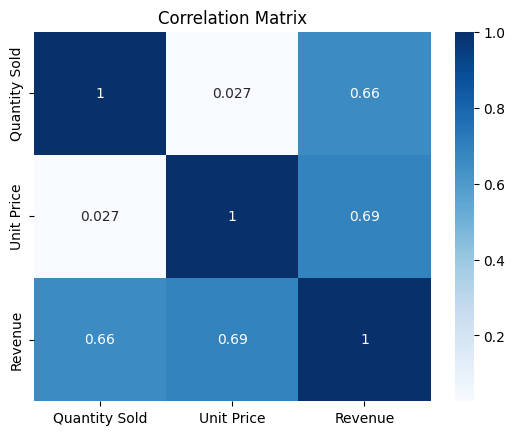

In [47]:
# Correlation heatmap
sns.heatmap(df[["Quantity Sold", "Unit Price", "Revenue"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()